# Abstract
This study investigates solving ordinary differential equations with given boundary values by the following methods: shooting method and finite difference method. Solutions are accurate within 0.01%. Accuracy is taken as root-mean-square (RMS) deviation of numerical solution from analytical solution. Comparison of two approaches with exact solution are provided in one plot. Both methods deliver accurate results. Another comparison touches on computational cost which was taken as execution time and precision which was taken as sum of squared errors. Shooting method provides more imprecise results but computational cost is lower, while finite difference method provides more precise results but computational cost is higher. 

# Introduction
Ordinary differential equation with boundary conditions is as follows:
$$ \frac{d^2\!y}{dt^2}+4y=0, y(0) = 2, y(\frac{\pi}{4}) = 6$$
The purpose of this work is to compare shooting method and finite difference method considering accuracy, and computational cost versus precision. Hypothesis before the work was that finite difference method is more accurate but takes more execution time to perform. <i>Methodology</i> part contains ideas behind the methods and corresponding formulas. According to these formulas, code was implemented, findings of which are described in <i>Results</i>. Final remarks are shown in <i>Conclusion</i>.

# Methodology
<b>Shooting method</b> \\
Shooting method is an iterative method that uses a guess for the first derivative at initial point. Given value of a function at initial point, we construct initial value problem (IVP). Then we solve IVP to integrate another boundary to the value of a function at final point. Those steps are repeated until needed accuracy is achieved. 
$$F(t, f(t), \frac{df(t)}{dt}) = \frac{d^2f(t)}{dt^2}, f(a)=\alpha, f(b) =\beta$$
Guess $f'(a)=f_{gi}$ and use this along $\alpha$ to get IVP. We solve IVP to get $f(b)=f_{gf}$. Then we compare $f_{gf}$ and $\beta$ and iterate further until they are equal. \\
<b>Finite difference method</b> \\
Main idea behind this method is to divide the interval into subintervals and construct system of equations by using finite difference formula at each subinterval. Formulas for central finite difference are presented below [1]:
$$\frac{dy}{dt}= \frac{y_{i+1}-y_{i-1}}{2h}$$
$$\frac{d^2y}{dt} = \frac{y_{i-1}-2y_i+y_{i+1}}{h^2}$$
Using matrix representation of the system of equations, the problem can be easily solved.

### Analytic Solution
We have the following ODE:
$$\frac{d^2y}{dt^2}+4y = 0$$
Let us construct characteristic equation of the ODE:
$$\lambda^2+4=0$$
$$\lambda^2=-4=4i^2$$
$$\lambda=\pm2i$$
Since we have complex roots the answer to the general solution would be:
$$y = e^{0 \cdot x}(C_1 cos(2x) + C_2 sin(2x))$$
$$y = C_1 cos(2x) + C_2 sin(2x)$$
Now we can consider the boundaries:
$$2 = C_1cos(2\cdot 0) + C_2 sin(2\cdot 0)$$
$$6 = C_1cos(2\cdot\frac{\pi}{4}) + C_2 sin(2\cdot\frac{\pi}{4})$$
We obtain following coefficients:
$$2=C_1$$
$$6=C_2$$
Final answer to the ODE under given conditions is:
$$y=2cos(2x)+6sin(2x)$$



In [ ]:
import numpy as np
def analytic(x):
  return 2*np.cos(2*x)+6*np.sin(2*x)

### Shooting Method

In [ ]:
from scipy.integrate import solve_ivp
def func(x,y): #representing ODE
  Y = []
  Y.append(y[1])
  Y.append(-4*y[0])
  return Y
def shooting():
  trange = np.linspace(0, np.pi/4, 50)
  y_exact = analytic(trange)
  for i in range(-15,15): # boundary of v0
    v0=i
    sol = solve_ivp(func, [trange[0], trange[-1]], [2,v0], t_eval = trange)
    y = sol.y[0]
    sum = np.sum((y[1:]-y_exact[1:])**2) # sum of squared errors
    rms = (sum/len(y[1:]))**0.5
    if rms < 0.01: #checking accuracy threshold
      break
  return v0, y[-1]
shooting()

(12, 5.999515250595735)

### Finite Difference Method

In [ ]:
def finite_diff():
  for n in range(5,100):
    trange = np.linspace(0, np.pi/4, n+1)
    y_exact = analytic(trange)
    h = (trange[-1]-trange[0])/n
    M = np.zeros((n+1, n+1)) # matrix representation of equations
    M[0, 0] = 1
    M[n, n] = 1
    for i in range(1, n):
      M[i, i-1] = 1
      M[i, i] = -2+4*h**2
      M[i, i+1] = 1
    b = np.zeros(n+1)
    b[0] = 2
    b[1:-1] = 0
    b[-1] = 6
    y = np.linalg.solve(M,b)
    sum = np.sum((y[1:-1] - y_exact[1:-1])**2) # sum of squared errors 
    rms = (sum/len(y[1:-1]))**0.5
    if rms < 0.0001: #checking accuracy threshold
      break
  return y

In [ ]:
finite_diff()

array([2.        , 2.1617504 , 2.32191522, 2.48037697, 2.63701944,
       2.79172773, 2.94438836, 3.09488936, 3.24312035, 3.3889726 ,
       3.53233913, 3.67311479, 3.81119632, 3.94648244, 4.07887393,
       4.20827367, 4.33458677, 4.45772056, 4.57758474, 4.69409138,
       4.80715504, 4.91669279, 5.02262427, 5.1248718 , 5.22336038,
       5.31801777, 5.40877454, 5.49556412, 5.57832286, 5.65699005,
       5.73150799, 5.80182203, 5.8678806 , 5.92963524, 5.98704065,
       6.04005474, 6.08863861, 6.13275663, 6.17237645, 6.20746899,
       6.23800853, 6.26397267, 6.28534235, 6.30210191, 6.31423905,
       6.32174487, 6.32461386, 6.32284393, 6.31643636, 6.30539587,
       6.28973053, 6.26945186, 6.24457471, 6.21511735, 6.18110136,
       6.14255171, 6.09949666, 6.05196781, 6.        ])

# Results

### Comparison of solutions

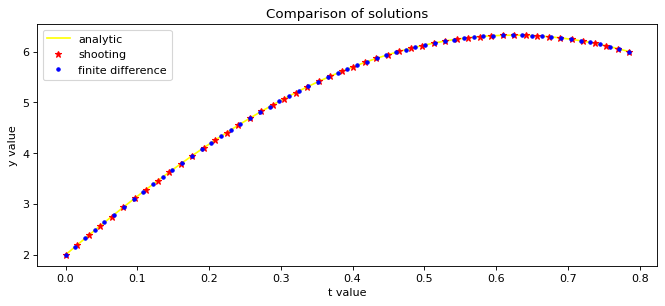

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(10, 4), dpi=80)
#analytic
t = np.linspace(0, np.pi/4, 50)
plt.plot(t, analytic(t), 'yellow', label = 'analytic') 

#shooting method
v0, yval = shooting()
sol = solve_ivp(func, [t[0], t[-1]], [2,v0], t_eval = t)
y = sol.y[0]
plt.plot(t, y, 'r*', label = 'shooting')

#finite difference method
t_ = np.linspace(0, np.pi/4, len(finite_diff()))
plt.plot(t_, finite_diff(), 'b.', label = 'finite difference')

plt.legend()
plt.title('Comparison of solutions')
plt.xlabel('t value')
plt.ylabel('y value')
plt.show()

In [ ]:
print('sum of squared errors of shooting method', np.sum((y - analytic(t))**2))
print('sum of squared errors of finite difference method', np.sum((finite_diff() - analytic(t_))**2))

sum of squared errors of shooting method 1.6543500793614687e-05
sum of squared errors of finite difference method 5.564245725771957e-07


As we can see from the plot graphs of each method overlap over analytic solution. That means results are accurate enough, however to compare which method gives more closer values to the exact solution I looked at sum of squared errors. To conclude, finite difference method is more accurate. 

### Computational cost VS Precision




In [ ]:
import timeit
y_exact = analytic(t)
cost_time_shooting = [timeit.timeit(lambda: shooting(), number = i) for i in range(10,110,10)]
precision_shooting = [round(np.sum(y - y_exact) + i/5, i) for i in range(3,13)]
precision_shooting = np.log(precision_shooting)

In [ ]:
y_exact_ = analytic(t_)
cost_time_finite = [timeit.timeit(lambda: finite_diff(), number = i) for i in range(10,110,10)]
precision_finite = [round(np.sum(finite_diff() - y_exact_) + i/5, i) for i in range(3,13)]
precision_finite = np.log(precision_finite)

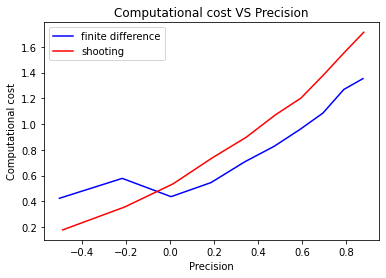

In [ ]:
plt.plot(precision_finite, cost_time_finite, 'b', label = 'finite difference')
plt.plot(precision_shooting, cost_time_shooting, 'r', label = 'shooting')
plt.title('Computational cost VS Precision')
plt.xlabel('Precision')
plt.ylabel('Computational cost')
plt.legend()
plt.show()

This plot shows that at the same computational cost finite difference method gives more precise results. In general finite difference method is efficient considering both execution time and precision. This can be explained by my implementation of shooting method which iterates over guessing values by one unit of increment. 

# Conclusion
This work shows that both shooting method and finite difference method are accurate numerical approaches to solve ordinary differential equations under given boundary conditions. To be more specific, according to RMS, finite difference is more accurate method. It can be explained by rigorous formulas of finite difference while shooting method is dependent on guessing values. \\
Comparison of computational cost versus precision resulted in finite difference being more efficient and more precise. It heavily depends on implementation of the shooting method. In further work, its efficiency could be increased by using python functions of finding a root or use bisection and etc. methods to accelerate the process of finding right guess. In this specific work, finite difference method is a better choice of solving ODE under given boundaries. 

# References
[1] S. C. Chapra and R. P. Canale, Numerical Methods for Engineers. McGraw-Hill Higher Education, 2010